In [8]:

import pandas as pd
import sys

sys.path.insert(1, '../')

from rule_benchmark import *

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
FOLDERS = ["approach1", "approach2"]

In [11]:
train_total = pd.read_pickle("train.pkl")
test_total = pd.read_pickle("test.pkl")

TOP_K_SAMPLES = 1

train = train_total[train_total["ranking"] < TOP_K_SAMPLES]
test = test_total[test_total["ranking"] < TOP_K_SAMPLES]

Number of rules:  44
Number of input variables:  4
Number of output variables:  4

approach1/:

Container:
Train: 0.9880694143167028
Test: 0.9613733905579399

Traversal:
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at lea

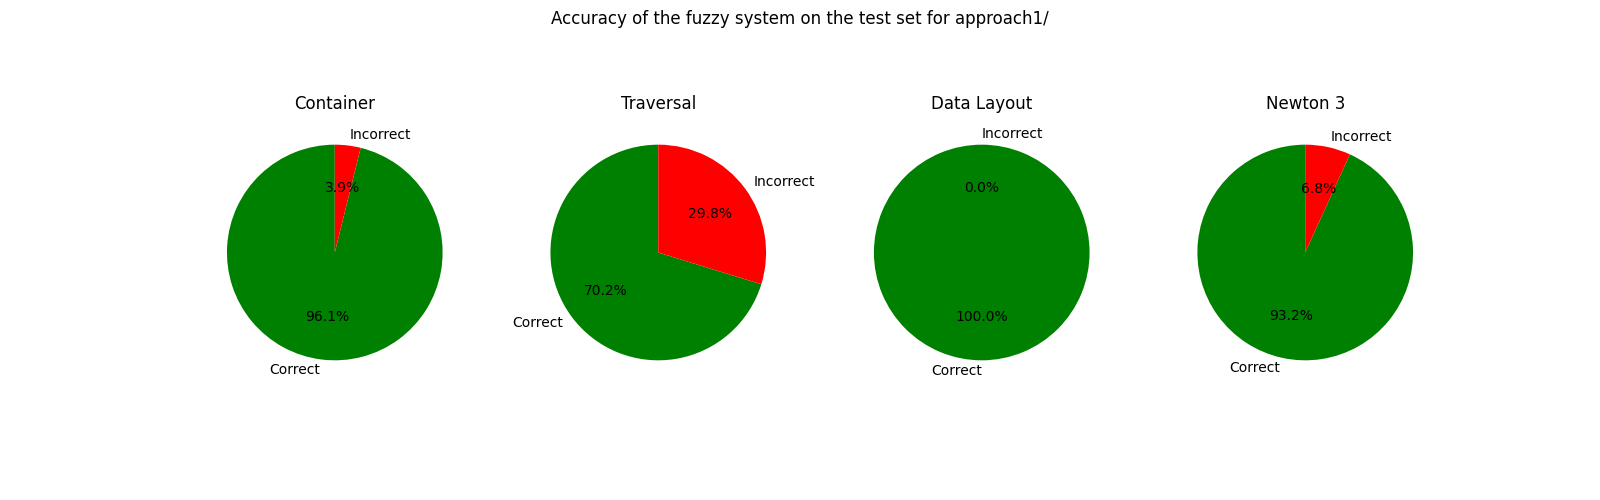

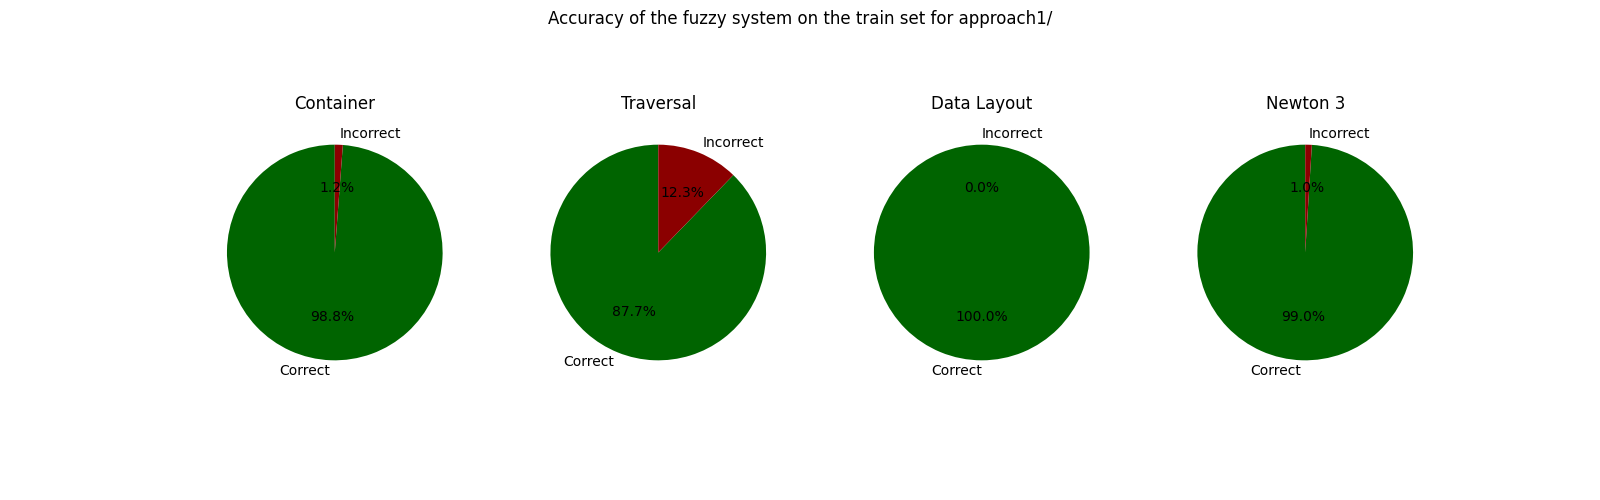

Number of rules:  44
Number of input variables:  4
Number of output variables:  4

approach2/:

Container:
Train: 0.9923076923076923
Test: 0.9513274336283186

Traversal:
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at lea

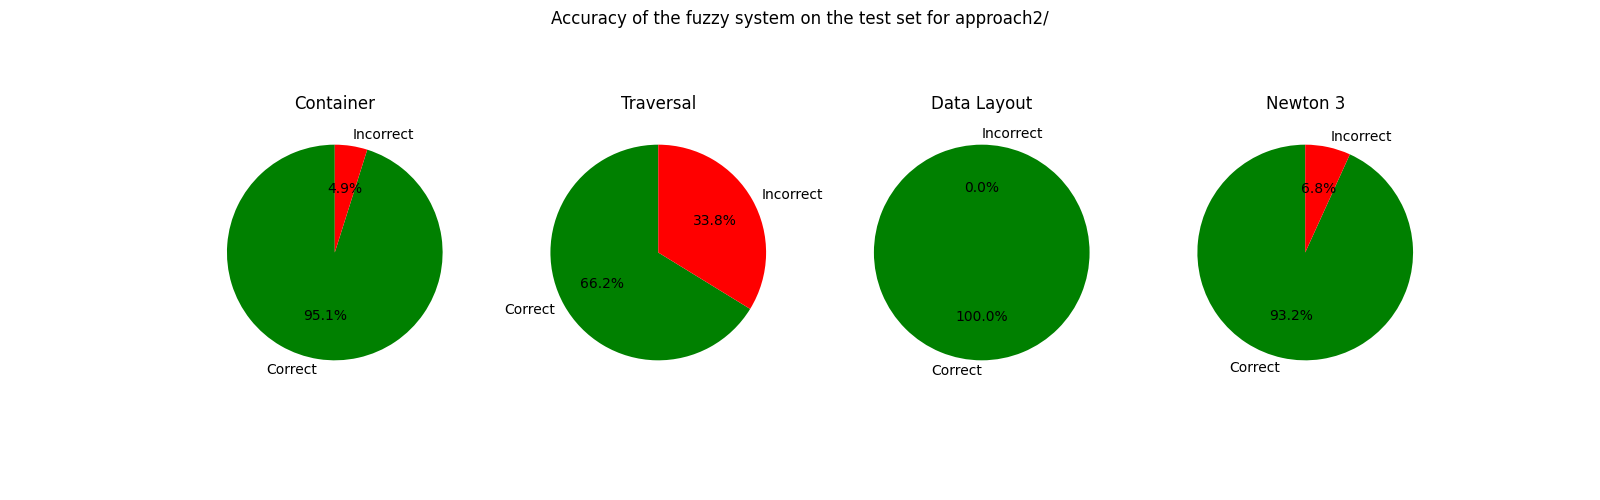

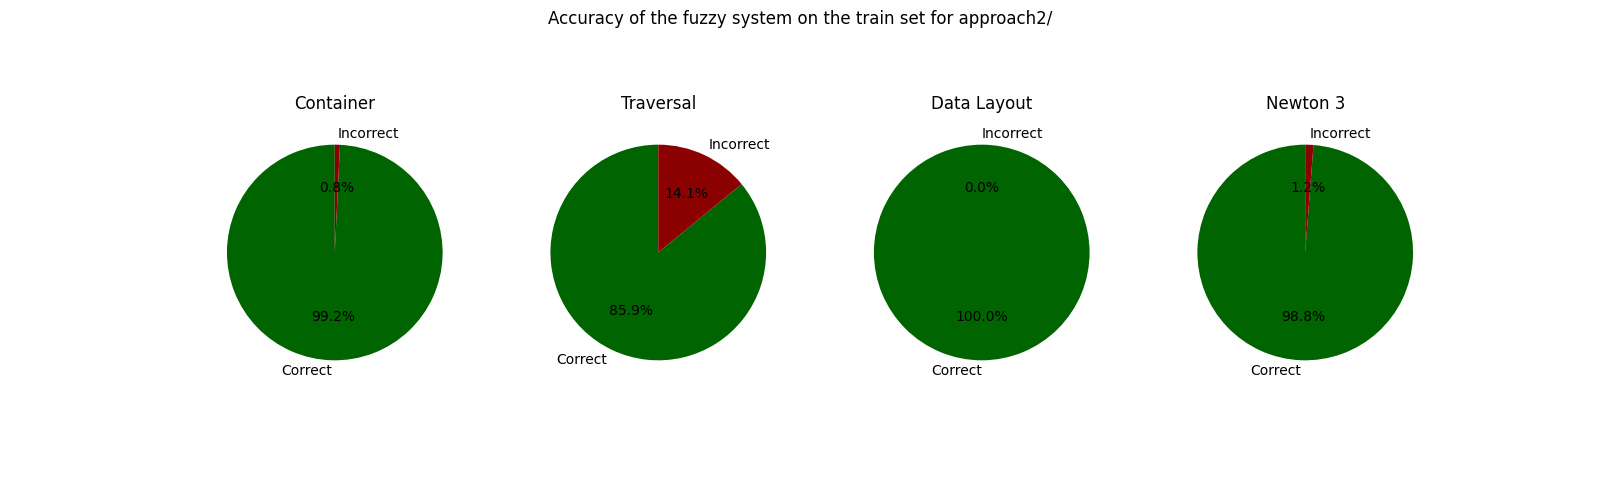

In [12]:
benchmark_rules("approach1/", train, test)
fiss, algo_ranking = benchmark_rules("approach2/", train, test)

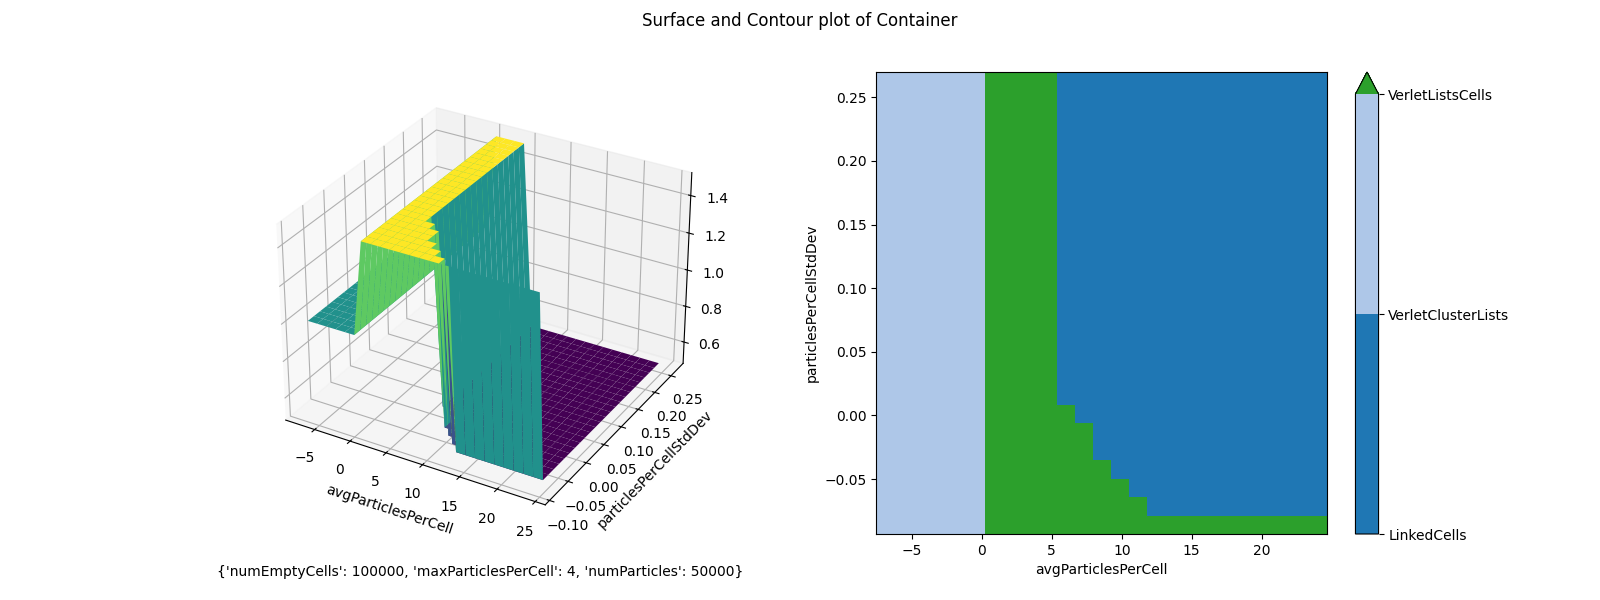

delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.08, number of points = 6.666666666666665, should be at least 10
delta_x = 0.

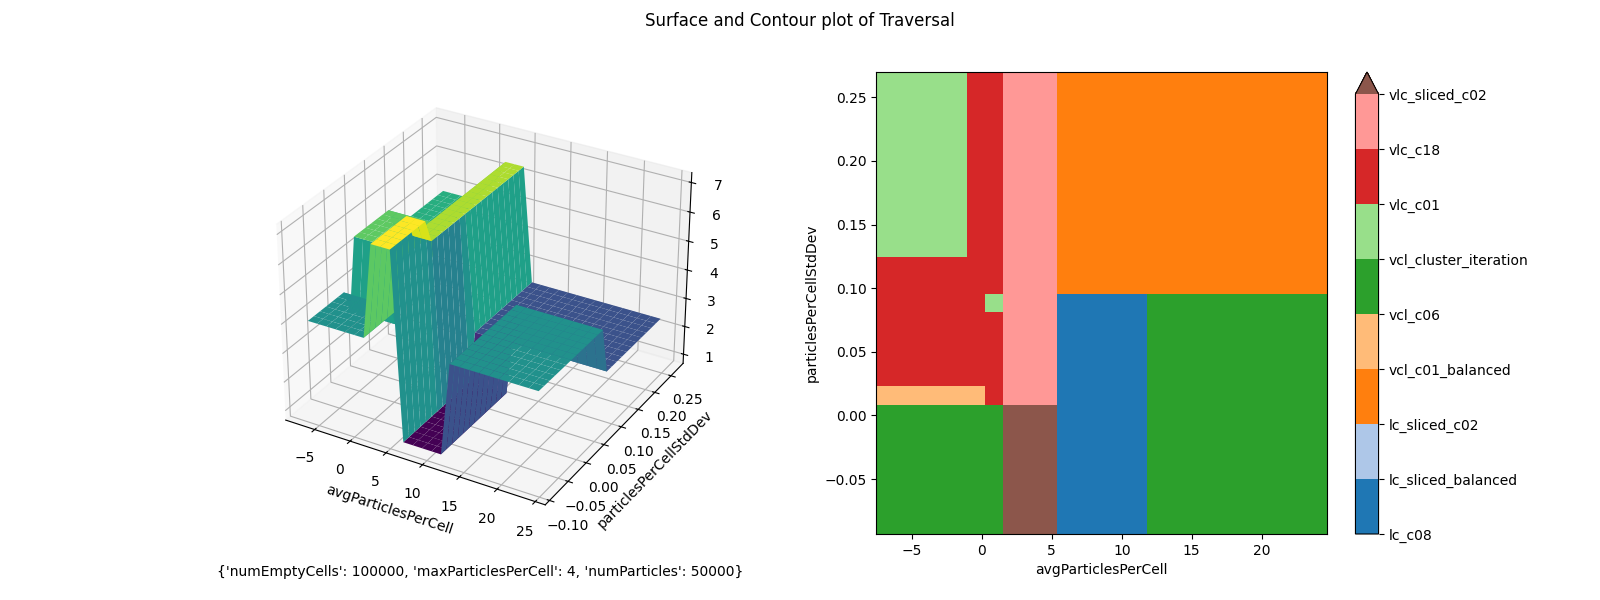

/home/manuel/AutoPas-FuzzyTuning-Bachelor-Thesis/data-analysis/../demo/fuzzy-test/python/fuzzy_system.py:542: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


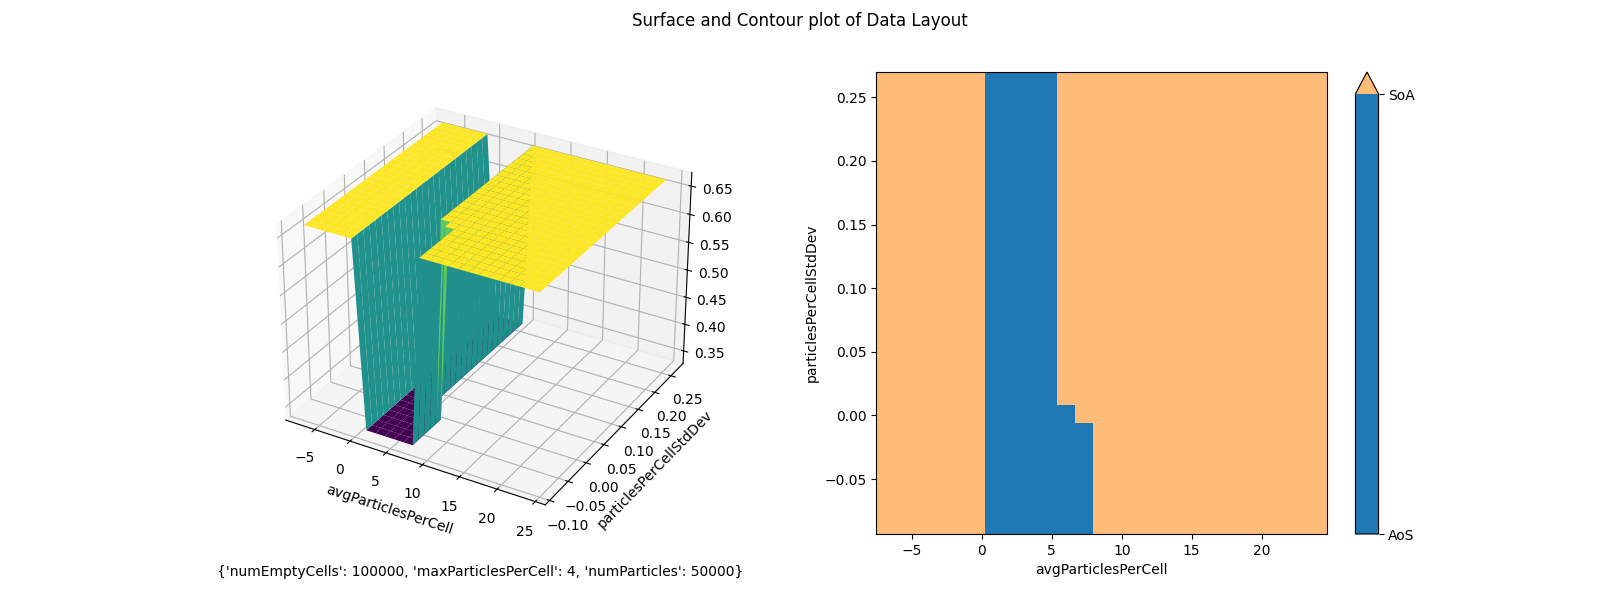

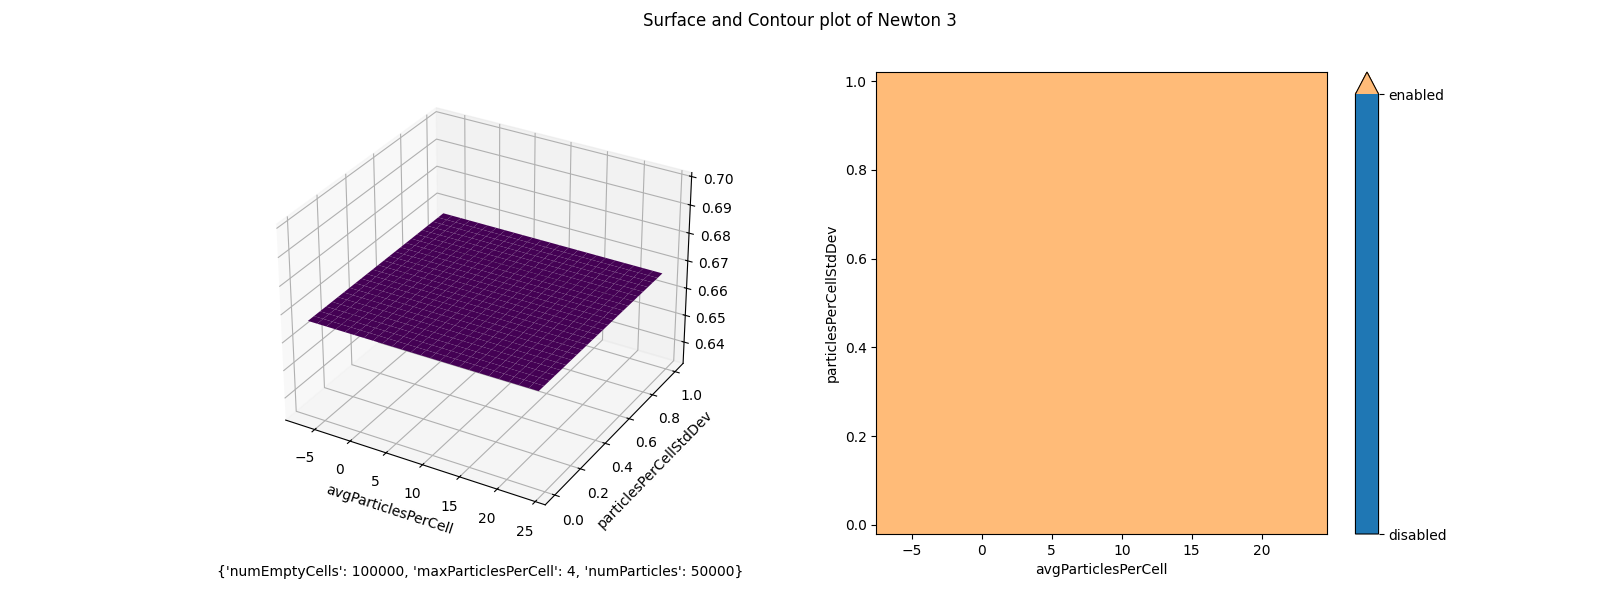

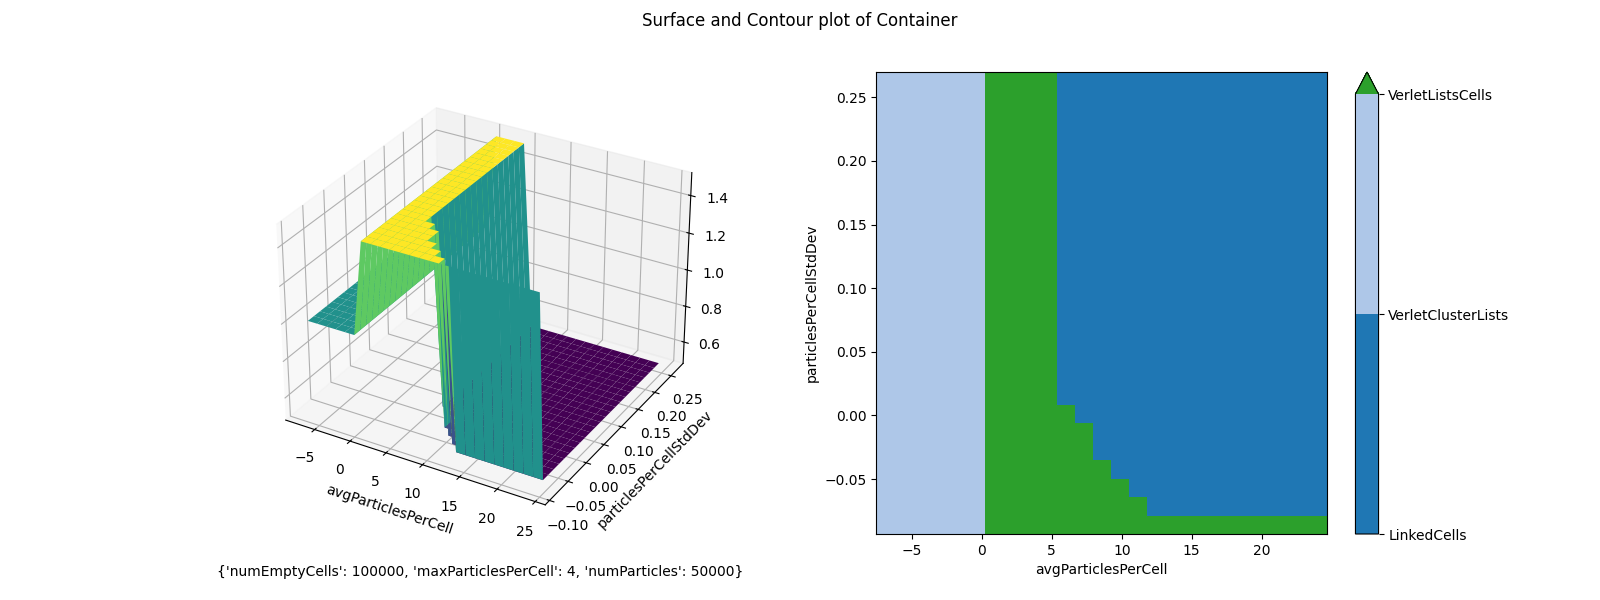

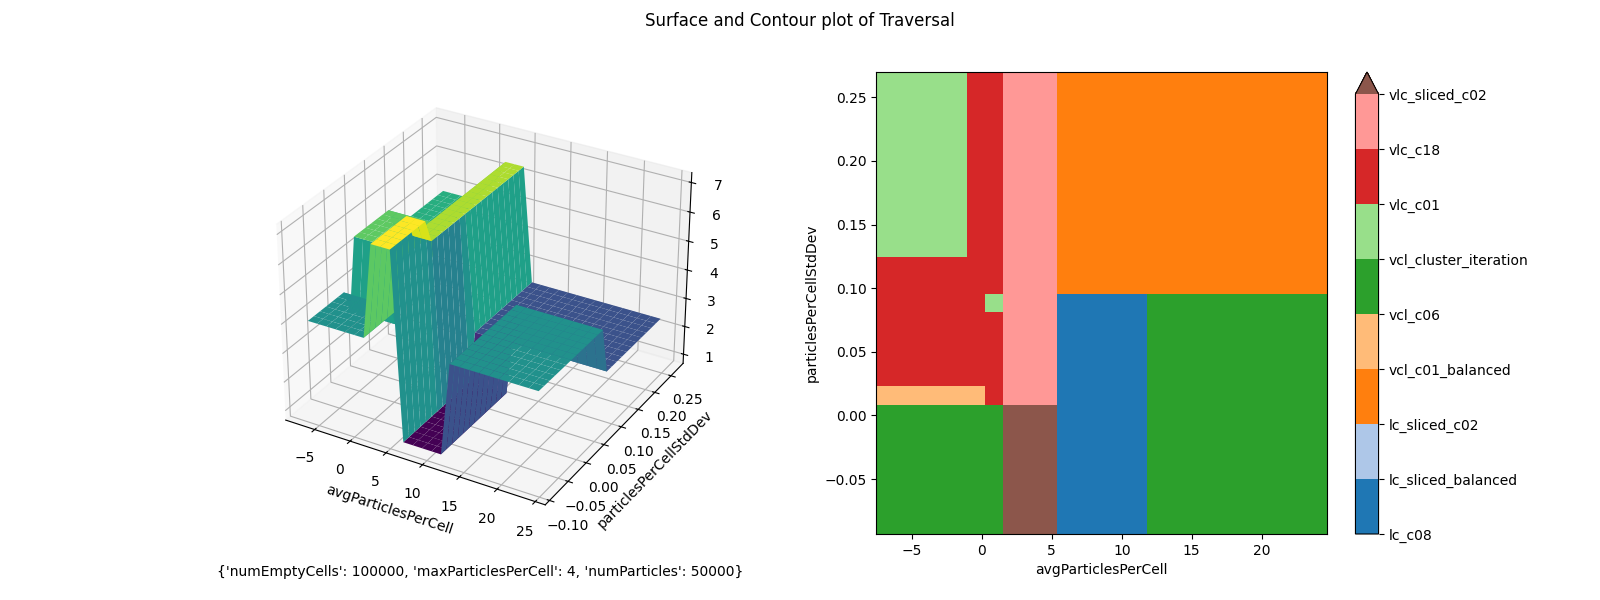

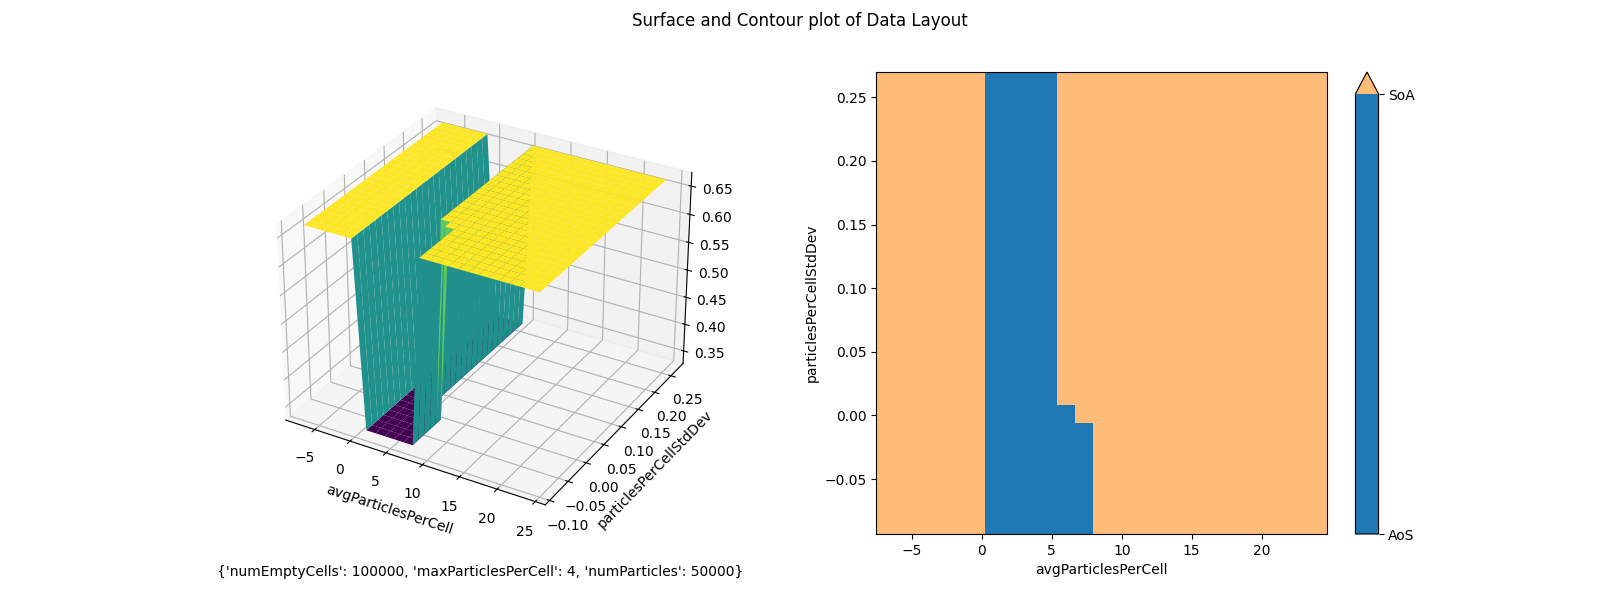

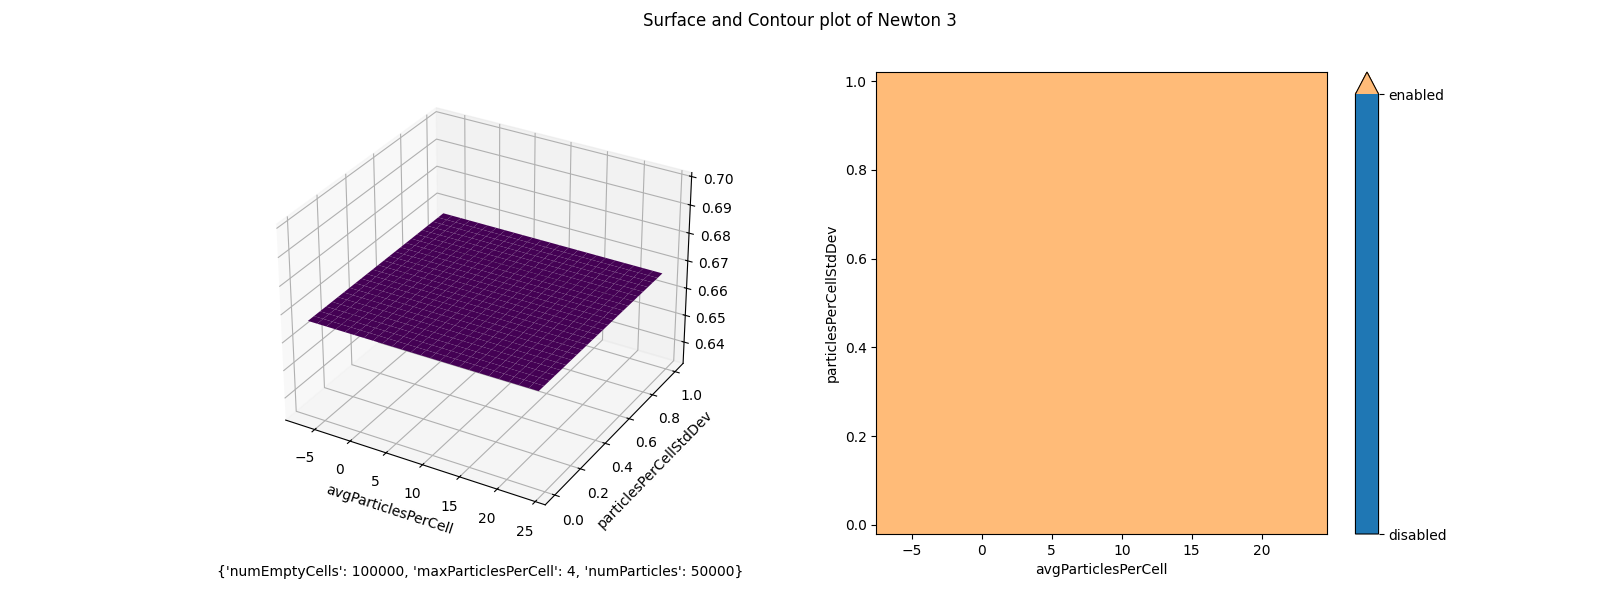

In [13]:
for fis in fiss.values():
    dim = fis.consequent_name
    label_map = {}
    for algo, value in algo_ranking[dim].items():
        label_map[value] = algo

    plot = plot3D_surface(fis.getInputCrispSets(), lambda data: algo_ranking[dim][fis.predictClosest(
        data, algo_ranking[dim])[1]], {
        "y": "particlesPerCellStdDev", "x": "avgParticlesPerCell", "z": dim}, labelMap=label_map, n=25, fixed_values={"numEmptyCells": 100000, "maxParticlesPerCell": 4, "numParticles": 50000})
    plot.show()

# Findings

- MoM works way better than the other methods.
- This is probably since the output variable is categorical and therefore interpolating between them is not a good idea.
  - Also the placement on the x-axis is somehow arbitrary. This also makes interpolation meaningless
- Traversal is very hard to predict. Maybe because there are so many possible values.